In [1]:
import prosail
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


In [2]:
csv = pd.read_csv(r'D:\OneDrive - mail.tau.ac.il\Romania training\data\RTMpropagation\Ex1\Ex1_TableLeafParam.csv')

In [154]:
#calculate cw (water per area) and cm (drymass per area)
csv['cw'] = (csv['wf'] - csv['wd'])/csv['A']
csv['cm'] = (csv['wd'] / csv['A'])
csv

,Cab,Car,wf,wd,A,N,cw,cm
0,10.0,3.0,1.02,0.63,39.269908,1.8,0.009931,0.016043
1,30.0,9.0,1.75,0.34,56.548668,1.3,0.024934,0.006013
2,50.0,15.0,2.92,0.62,76.969020,1.4,0.029882,0.008055


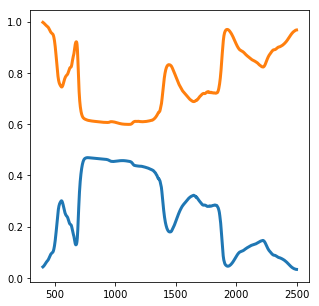

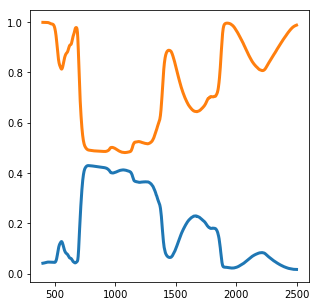

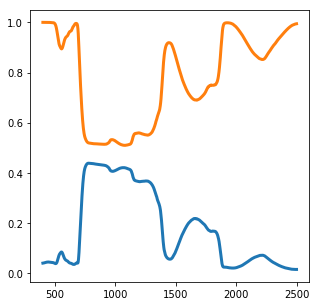

In [155]:
# base model for warmup
for row in range(csv.shape[0]):
    Cab,Car,wf,wd,A,N,cw,cm = csv.iloc[row,:]
    lam, rho, tau = prosail.run_prospect(n=N, cab=Cab, car=Car,cbrown=0, cw=cw, cm=cm, prospect_version='5')
    plt.figure(figsize=(5,5))
    plt.plot(lam, rho, label = 'Reflectance', linewidth=3)
    plt.plot(lam, (1-tau), label = 'Transmitance', linewidth=3)

    

In [104]:
#calculate how many pixels is r2,A,P
r2_pixels = [np.sqrt(i/(2*np.pi))*300/2.54 for i in csv.loc[:,'A']]
A_pixels = np.array([np.pi*i*2*i for i in r2_pixels])
P_pixels = np.array([(2*np.pi)*np.sqrt((i**2 + (2*i)**2)/2) for i in r2_pixels])

#uncertainties
u_balance = 0.02
u_A = P_pixels / A_pixels
u_balance_d = np.sqrt(u_balance**2 + u_balance**2)
d_weight = csv['wf'] - csv['wd']
u_cw = np.sqrt((u_balance_d/d_weight)**2 + (u_A)**2)
u_dm = np.sqrt((u_balance/csv['wd'])**2 + (u_A)**2)

In [146]:
lower, upper = 0, 1.0
mu, sigma = 0, 1.0
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
X = X.rvs(n)

In [148]:
# realisations
n=1000
Ucab = 3
Ucar = 1.5
A_real = []
Cab_real = []
Car_real = []
cw_real = []
cm_real = []
for i in range(3):
    A_real.append(np.random.normal(1,u_A[i],n)*csv['A'].iloc[i])
    Cab_real.append(X*Ucab+csv['Cab'].iloc[i])
    Car_real.append(X*Ucar+csv['Car'].iloc[i])
    cw_real.append(np.random.normal(1,u_cw[i],n)*csv['cw'].iloc[i])
    cm_real.append(np.random.normal(1,u_dm[i],n)*csv['cm'].iloc[i])

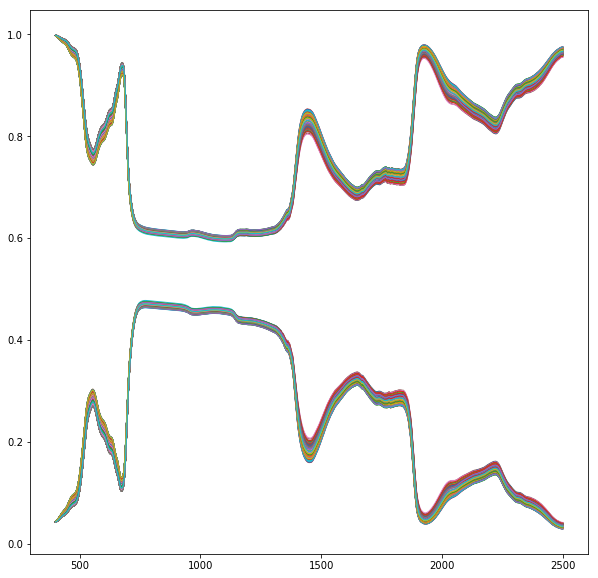

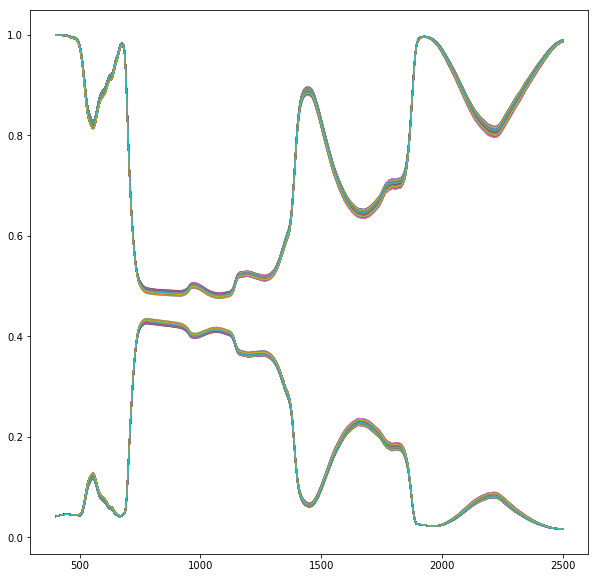

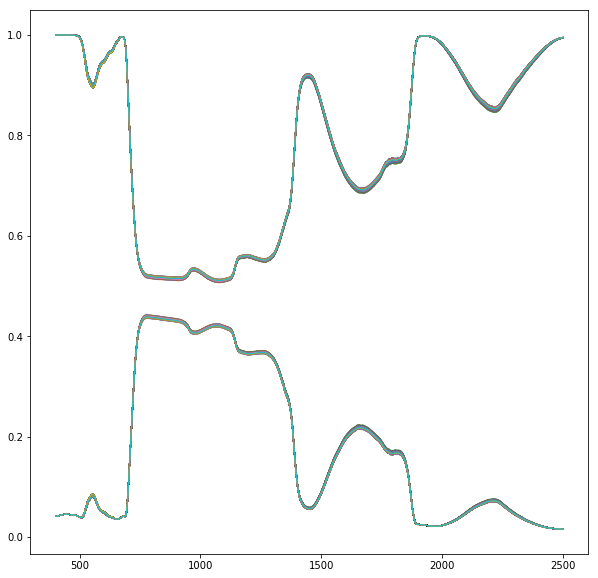

In [156]:
for row in range(csv.shape[0]):
    lam_array = []
    rho_array = []
    tau_array = []
    for i in range(1000):
        Cab,Car,wf,wd,A,N,cw,cm = csv.iloc[row,:]
        lam, rho, tau = prosail.run_prospect(n=N, cab=Cab_real[row][i], car=Car_real[row][i],cbrown=0, cw=cw_real[row][i], cm=cm_real[row][i], prospect_version='5')
        lam_array.append(lam)
        rho_array.append(rho)
        tau_array.append(1-np.array(tau))
    plt.figure(figsize=(10,10))
    plt.plot(np.array(lam).T, np.array(rho_array).T, label = 'Reflectance', linewidth=1)
    plt.plot(np.array(lam).T, np.array(tau_array).T, label = 'Transmitance', linewidth=1)

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(lam, rho, label = 'Reflectance', linewidth=3)
plt.plot(lam, (1-tau), label = 'Transmitance', linewidth=3)
plt.legend(fontsize=30, loc='center right')
plt.yticks(size=30)
plt.xticks(size=30)
plt.xlabel('Wavelength', size=30);

In [ ]:
n  = 1.2 #Leaf structure parameter
cab = 30 # Chlorophyll content
car = 10 # Carotenoid content
cbrown = 1 # Brown pigments
cw =0.015 # Equivalent water thickness
cm = 0.009 # Leaf mass per unit area
lam, rho, tau = prosail.run_prospect(n, cab, car, cbrown, cw, cm, prospect_version='5')